`WUR Machine Learning Course - Project Assignment 3 - Version 2022`

# **Clustering with K-Means**
Clustering helps to understand how data samples are related to each other. Clusters are composed by points that are similar to each other, but relatively different to the rest of points. Clustering methods do not need data labels and therefore are called *unsupervised*, as opposed to supervised ones that we discussed in the previous exercises. In datasets where no labels are available, finding clusters of data points can help grouping the data samples in a principled way.

# **Instructions**
In this exercise you will code the k-means algorithm by prototyping on a synthetic dataset, and then use it to find clusters of world cities based on some of their statistics. You will then analyze the clusters to characterize the different types of cities based on their clustering.

# **Environment set-up**

In [1]:
## Importing tabular data
import pandas as pd

## Plotting and visualization
from matplotlib import pyplot as plt

import numpy as np
import random
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler

In [2]:
# We set the random seed to have consistent results
seed_value = 2

# **Importing files to Colab**

Run the cell below and check if there is a new folder created on colab with the name `data` containing several `.csv` files with data.

In [3]:
! git clone https://gist.github.com/dmarcosg/d01e120a4e33d4c11de30091259ed51e data

Cloning into 'data'...
remote: Enumerating objects: 11, done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 11
Receiving objects: 100% (11/11), 14.04 KiB | 4.68 MiB/s, done.
Resolving deltas: 100% (4/4), done.


Now we can load `data2d.csv`, which contains 200 data points and 2 variables.

In [4]:
data2d = pd.read_csv('data/data2d.csv',header=None)

## Convert toy 2D data from pandas to numpy array
data2d = np.array(data2d)

# **K-Means implementation and toy 2D data**

We have seen how k-means works during the lectures. First use one or more code cells to experiment with the different operations you will need:


*   Initialize the cluster centroids using `K` randomly selected data points. One way to do this is by using the `random.sample()` function.
*   Compute the distance between each data point and each cluster centroid. This can be efficiently done by using the `pairwise_distances` function included in the `sklearn` package.
*   Find the nearest cluster centroid for each data point. One way is to use the `numpy` function `argmin()`.
*   Update each cluster centroid by computing the mean of all data points assigned to it.





### **Let's start by taking a look at the data**

Text(0, 0.5, 'Variable 1')

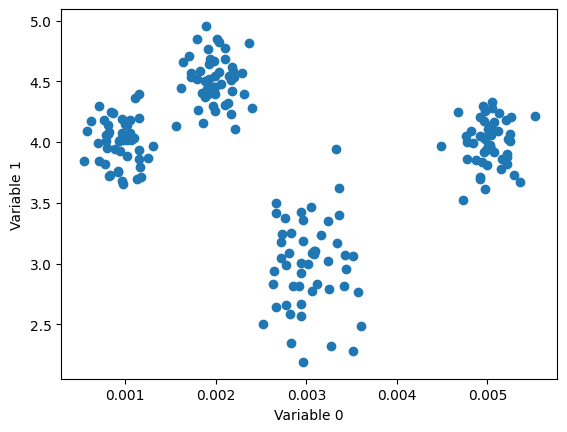

In [5]:
## Visualize the 2D data
plt.scatter(data2d[:,0],data2d[:,1])
plt.xlabel('Variable 0')
plt.ylabel('Variable 1')

**Action 1:** Initialize the cluster centroids

In [6]:
random.seed(seed_value) # Within the code-block to ensure consistent outputs

# TODO: Choose K data points and extract cluster centroids. Hint: look at the imports
def get_cluster_centroids(arr, K=1):
    # Choose K data points randomly
    centroids_indices = random.sample(range(len(arr)), K)
    # Extract cluster centroids
    cluster_centroids = arr[centroids_indices]
    return cluster_centroids

In [7]:
# Step 1: Initialize cluster centroids using K randomly selected data points
K = 4  # Number of clusters
centroids = get_cluster_centroids(data2d, K)
print("Initial centroids:")
print(centroids)

Initial centroids:
[[1.80754756e-03 4.26642985e+00]
 [1.85400400e-03 4.15472797e+00]
 [2.16601237e-03 4.23465689e+00]
 [1.02074951e-03 3.88311060e+00]]


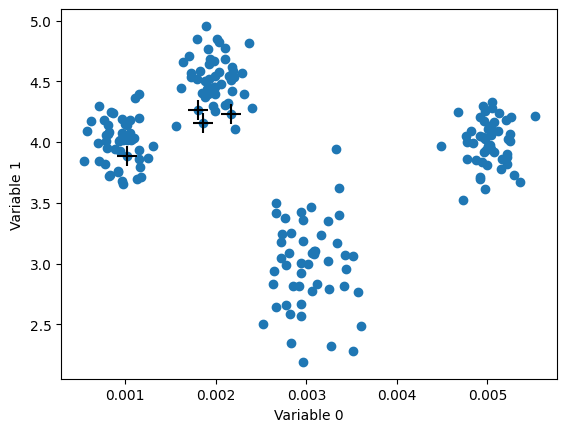

In [8]:
# Visualize the 2D data + centroids
plt.scatter(data2d[:,0],data2d[:,1])
plt.xlabel('Variable 0')
plt.ylabel('Variable 1')
plt.scatter(centroids[:,0], centroids[:,1], marker = '+', c='black', s=200, alpha=1)

**Question 1:** Why do we randomly select existing data points for the initialization, instead of just assigning random values? \
**Answer:**

**------------------------------Answer Start----------------------**

We select an exiting data point for the initialization to make sure that the centroid are close to the data/cluster and not randomly at the edge of the possible distribution. Beacuse of the latter it would take much longer to find the right centoids.

**------------------------------Answer End----------------------**

**Action 2:**
Compute distance between all data points and all centroids (which should result in a matrix of distances of shape [N,K], with N the number of data points and K the number of clusters) and get the closest centroid to each data point (which should result in a vector of shape [N] where each entry is an integer between 0 and K-1).

In [9]:
# Step 2: Compute the distance between each data point and each cluster centroid
distances = pairwise_distances(data2d, centroids)
print("\nDistances between data points and centroids:")
print(distances)

# Step 3: Find the nearest cluster centroid for each data point
nearest_centroids = np.argmin(distances, axis=1)
print("\nNearest centroids for each data point:")
print(nearest_centroids)


Distances between data points and centroids:
[[4.20977799e-01 5.32679666e-01 4.52750799e-01 8.04297551e-01]
 [1.17136097e-01 2.28837954e-01 1.48909297e-01 5.00456072e-01]
 [2.10771302e-01 3.22473101e-01 2.42544145e-01 5.94091310e-01]
 [1.89920324e-01 3.01622150e-01 2.21693277e-01 5.73240306e-01]
 [1.85510599e-01 2.97212418e-01 2.17283533e-01 5.68830592e-01]
 [2.67241879e-01 3.78943768e-01 2.99015150e-01 6.50561501e-01]
 [1.69546901e-01 2.81248758e-01 2.01320007e-01 5.52866831e-01]
 [1.79562335e-01 2.91264186e-01 2.11335396e-01 5.62882276e-01]
 [3.71958392e-02 1.48896775e-01 6.89676824e-02 4.20515332e-01]
 [2.80783597e-01 3.92485441e-01 3.12556543e-01 6.64103502e-01]
 [5.57041118e-01 6.68742976e-01 5.88814046e-01 9.40360872e-01]
 [1.31236930e-01 1.95370819e-02 9.94656016e-02 2.52083135e-01]
 [4.99945245e-01 6.11647116e-01 5.31718251e-01 8.83264939e-01]
 [1.28957954e-01 2.40659742e-01 1.60730876e-01 5.12277997e-01]
 [0.00000000e+00 1.11701889e-01 3.17749797e-02 3.83320062e-01]
 [3.01204

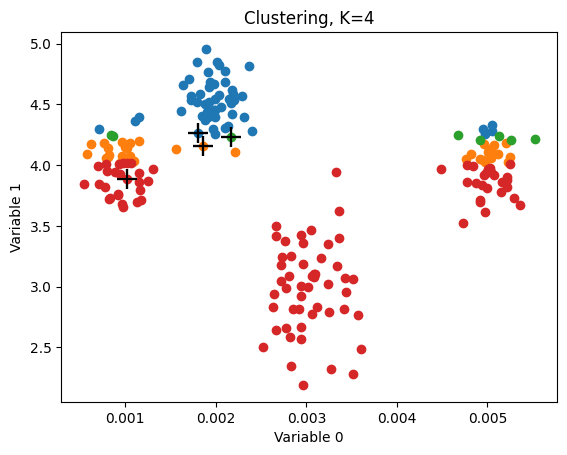

In [10]:
# Plot the cluster assignments with this code
for i in range(K):
  plt.scatter(data2d[nearest_centroids==i, 0], data2d[nearest_centroids==i, 1])
  plt.xlabel('Variable 0')
  plt.ylabel('Variable 1')
  plt.title(f"Clustering, K={K}")
  plt.scatter(centroids[:,0], centroids[:,1], marker = '+', c='black', s=200, alpha=1)

plt.show()

**Question 2:** If you haven't used any data normalization, you might find surprising the centroid assignment. Why do you think is that? \
**Answer:**

**------------------------------Answer Start----------------------**

- when we have a look on the axes, we see that they have a different scale/range. While Variable 0 ranges from 0 - 0.006 (steps = 0.001), variable 1 ranges from 2 - 5 (steps = 0.5).
- because of that it might look like the points are close to each other but they are actually not that close. Based on that it looks like that a different centroid is closer to a point.

**------------------------------Answer End----------------------**

**Action 3:** Go back to Actions 1 and 2 but, this time, standardize the data such that both variables have a similar range.

In [11]:
# scaling the data
X_scaled = StandardScaler().fit_transform(data2d)

In [12]:
# Step 1: Initialize cluster centroids using K randomly selected data points
K = 4  # Number of clusters
centroids = get_cluster_centroids(X_scaled, K)
print("Initial centroids:")
print(centroids)

# Step 2: Compute the distance between each data point and each cluster centroid
distances = pairwise_distances(X_scaled, centroids)
print("\nDistances between data points and centroids:")
print(distances)

# Step 3: Find the nearest cluster centroid for each data point
nearest_centroids = np.argmin(distances, axis=1)
print("\nNearest centroids for each data point:")
print(nearest_centroids)


Initial centroids:
[[-0.39227479  1.10949424]
 [ 1.26884671  0.62550421]
 [ 1.61850427  0.51019865]
 [-1.17056087  0.33276855]]

Distances between data points and centroids:
[[0.27894354 1.94289931 2.31045553 1.19975119]
 [0.31451672 1.84717483 2.20931654 0.79420258]
 [0.12462802 1.76425633 2.13079982 0.97966395]
 [0.17864436 1.8018018  2.16748814 0.92292032]
 [0.18066942 1.79384089 2.15939937 0.92282659]
 [0.27839142 1.99521976 2.36238207 0.91190232]
 [0.23890102 1.84845444 2.21312968 0.86095505]
 [0.21717403 1.83744181 2.20257542 0.8826042 ]
 [0.3964036  1.69464807 2.05215353 0.83888194]
 [0.10222526 1.83041812 2.19826814 1.03609401]
 [0.47162296 1.9793692  2.34242784 1.42719381]
 [0.77782976 2.05810194 2.40012999 0.40338786]
 [0.40150271 2.00598349 2.37185806 1.30673423]
 [0.26395075 1.77995617 2.14304236 0.86099784]
 [0.5082815  1.88430712 2.23831105 0.64088661]
 [0.28336371 2.0113421  2.37906774 0.95825774]
 [0.23333539 1.9440066  2.31104202 0.92128551]
 [0.1475709  1.86121393 2.2

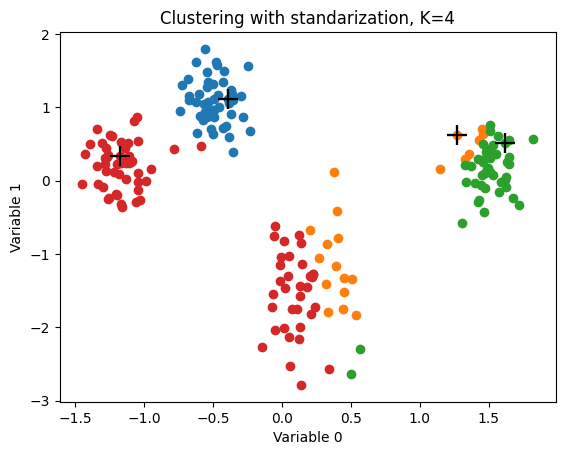

In [13]:
# Plot the cluster assignments with this code
for i in range(K):
  plt.scatter(X_scaled[nearest_centroids==i, 0], X_scaled[nearest_centroids==i, 1])
  plt.xlabel('Variable 0')
  plt.ylabel('Variable 1')
  plt.title(f"Clustering with standarization, K={K}")
  plt.scatter(centroids[:,0], centroids[:,1], marker = '+', c='black', s=200, alpha=1)

plt.show()

**Question 3:** What effect does the standardization have in the cluster assignment? \
**Answer:**

**------------------------------Answer Start----------------------**

- the standardization ensures that each feature has a mean of 0 and a standard deviation of 1. Because of that the axes range change and also the location of the centroids
-  because of that also the cluster assignment of the points changes

**------------------------------Answer End----------------------**

**Action 4:** Implement code for updating the cluster centroids based on the mean

In [14]:
# Step 4: Update each cluster centroid by computing the mean of all data points assigned to it
updated_centroids = np.array([X_scaled[nearest_centroids == k].mean(axis=0) for k in range(K)])
print("\nUpdated centroids:")
print(updated_centroids)


Updated centroids:
[[-0.49262289  1.07858422]
 [ 0.70874406 -0.59398774]
 [ 1.47582374  0.04462298]
 [-0.67034645 -0.48030621]]


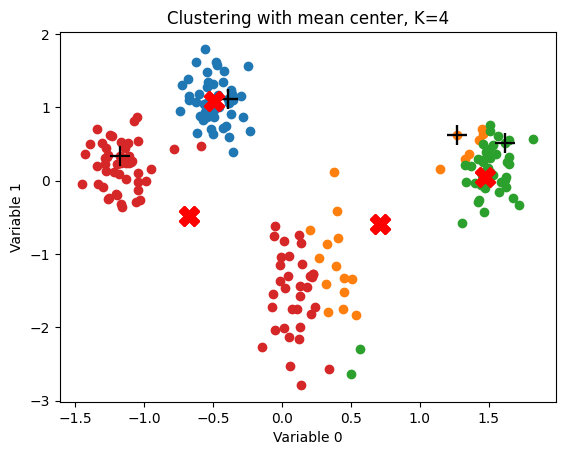

In [15]:
# Plot the cluster assignments with this code
for i in range(K):
  plt.scatter(X_scaled[nearest_centroids==i, 0], X_scaled[nearest_centroids==i, 1])
  plt.xlabel('Variable 0')
  plt.ylabel('Variable 1')
  plt.title(f"Clustering with mean center, K={K}")
  plt.scatter(centroids[:,0], centroids[:,1], marker = '+', c='black', s=200, alpha=1)
  plt.scatter(updated_centroids[:,0], updated_centroids[:,1], marker = 'X', c='red', s=200, alpha=1)

plt.show()

**Question 4:** What happens to the cluster centroids after you update them?
**Answer:**


**------------------------------Answer Start----------------------**

- the location of the cluster centroids shifted to the mean location of each cluster. But the corresponding cluster for each point did not change, even when a new centerpoint location might be closer now.
- if we also want to change the nearest cluster label, we need to check the distances again/make all processs so far iterative

**------------------------------Answer End----------------------**

**Action 5:** Fill in the following function definition to create your own K-Means function. Hint: you wrote most of the code already

In [16]:
def my_kmeans(data, K=4, maxiter=10, do_plot=False):

    # Step 1: Initialize cluster centroids using K randomly selected data points
    centroids = get_cluster_centroids(data, K)
    print("Initial centroids:")
    print(centroids)

    for r in range(maxiter):
        # Step 2: Compute the distance between each data point and each cluster centroid
        distances = pairwise_distances(data, centroids)
        print("\nDistances between data points and centroids:")
        print(distances)

        # Step 3: Find the nearest cluster centroid for each data point
        nearest_centroids = np.argmin(distances, axis=1)
        print("\nNearest centroids for each data point:")
        print(nearest_centroids)

        # Step 4: Update each cluster centroid by computing the mean of all data points assigned to it
        updated_centroids = np.array([data[nearest_centroids == k].mean(axis=0) for k in range(K)])
        print("\nUpdated centroids:")
        print(updated_centroids)

        # Check for convergence (if centroids do not change significantly)
        if np.allclose(updated_centroids, centroids):
            break
        centroids = updated_centroids

       # Optionally, plot the data and assignments. Only for 2D data.
    if do_plot:
      for i in range(K):
        plt.scatter(data[nearest_centroids==i,0], data[nearest_centroids==i,1])
        plt.title(f"K-means clustering, run = {r+1}")
        plt.xlabel('Variable 0')
        plt.ylabel('Variable 1')
        plt.scatter(centroids[:,0], centroids[:,1], marker = '+', c='black', s=200, alpha=1)
      plt.show()
    return nearest_centroids, centroids

Initial centroids:
[[-0.61526359  0.6527382 ]
 [-0.58475464  0.46779719]
 [-0.37985203  0.60013279]
 [-1.13197079  0.01808953]]

Distances between data points and centroids:
[[0.70171707 0.88339744 0.7652943  1.45973428]
 [0.20033601 0.37939184 0.30834731 1.0039759 ]
 [0.38407751 0.54948785 0.40851235 1.19415829]
 [0.33481445 0.50648287 0.38629546 1.14010257]
 [0.33037899 0.50046442 0.37728956 1.13778213]
 [0.44587292 0.63320928 0.57397952 1.1718835 ]
 [0.28736832 0.46668336 0.37596623 1.08268027]
 [0.30674575 0.48433551 0.38468771 1.10421628]
 [0.2014354  0.2945939  0.1222354  0.99333135]
 [0.48039465 0.6561072  0.52996709 1.27112283]
 [0.9339707  1.11336285 0.97884866 1.69262514]
 [0.27295196 0.19836151 0.43313635 0.54566645]
 [0.83065092 1.01343186 0.89585422 1.57549039]
 [0.24517272 0.40849024 0.28986262 1.06085853]
 [0.         0.18744058 0.24121759 0.81839188]
 [0.50197038 0.68924589 0.62416733 1.22293246]
 [0.42087612 0.60694432 0.53212409 1.17184435]
 [0.43266242 0.61227642 0.5

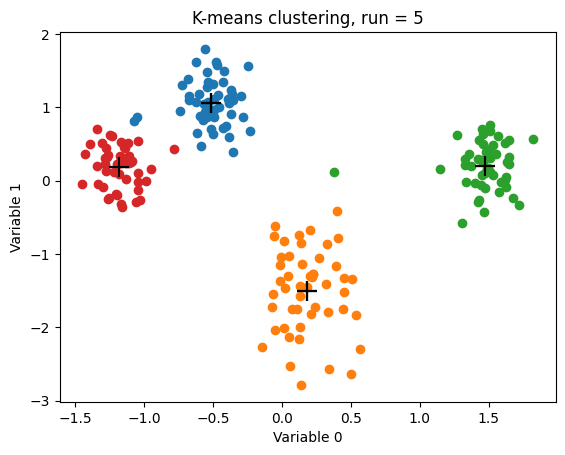

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]),
 array([[-0.51669667,  1.05709901],
        [ 0.18414198, -1.50060237],
        [ 1.47380913,  0.20364509],
        [-1.18032026,  0.18839933]]))

In [17]:
random.seed(seed_value) # Within the code-block to ensure consistent outputs

# Run your implemented kmeans function on the 2D data
my_kmeans(X_scaled, do_plot= True)

**Question 5:** What happens to the cluster centroids as the iterations progress? When do they stop changing?
**Answer:**

**------------------------------Answer Start----------------------**

- through the iteration progress the cluster centroids move more and more in the middle of a group of points, what we would assume to be a cluster based on visual inspection
- also the cluster label of the points changes because of the moving cluster centroids. After we move a centroid a different one might be closer to a point and we assign its cluster label to it. Afterwards we calculate the mean again, because the mean distances changes when points move cluster labels
- they stopped changing after 5 runs


**------------------------------Answer End----------------------**

# **Exploring some real data about cities**

This dataset containts several features concerning urban areas in OECD countries. Start by running the following code cell and taking a look at the loaded variables. `data_cities` contains the eight variables, `feature_names` contains the names of the variables and `regions` contains the name of the geographic region where each city is located.

In [18]:
## Read the .csv files
country_regions = pd.read_csv('data/country_codes.csv')
oecd_cities_stats = pd.read_csv('data/oecd_cities_stats.csv')

## Extract the variables and their names
data_cities = np.array(oecd_cities_stats.iloc[1:,1:], dtype=np.float32)
number_of_variables = data_cities.shape[1]
feature_names = list(oecd_cities_stats.columns.values[1:])

## Extract the country codes and region name of each city
country_codes = []
regions = []
for name in oecd_cities_stats['Metropolitan areas'][1:]:
  country_codes.append(name[0:2])
  regions.append(country_regions[name[0:2]][1])
regions = np.array(regions)
country_codes = np.array(country_codes)

In [19]:
oecd_cities_stats

,Metropolitan areas,Population,Youth-ration,Elderly-ratio,Population density,Green-area,Core-concentration,Pollution-pm2.5,Unemployment
0,NaN,Persons,Ratio,Ratio,Persons/sqkm,Sqm/Person,Percentage,micrograms/cube_meter,Percentage
1,AUS01: Sydney,4756398,27.67,19.49,388.94,47.3,87.33,2.4,5.36
2,AUS02: Melbourne,4344673,26.54,19.6,430.03,35.03,86.47,4.8,5.99
3,AUS03: Brisbane,2236044,28.89,17.86,144.8,517.91,72.58,2.1,5.65
4,AUS04: Perth,1972849,27.37,18.34,312.68,39.61,73.93,3,4.34
...,...,...,...,...,...,...,...,...,...
276,US070: Des Moines,634289,33.02,17,70.32,4766.7,70.79,8.9,4.6
277,US077: Omaha,898090,32.62,16.73,78.7,711.31,59.5,9.7,4.29
278,US081: Akron,541445,26.52,21.93,497.7,1286.89,100,9,7.15
279,US089: Salt Lake City,1177194,37.36,13.3,42.48,535.37,91.12,3.5,4.23


**Action 6:** Run K-Means clustering on data_cities.

Initial centroids:
[[1.889112e+06 1.886000e+01 2.204000e+01 4.808100e+02 2.670300e+02
  7.013000e+01 1.790000e+01 3.810000e+00]
 [5.343070e+05 2.029000e+01 2.891000e+01 3.526600e+02 5.833400e+02
  4.068000e+01 1.740000e+01 3.490000e+00]
 [1.218801e+06 2.184000e+01 3.469000e+01 3.943400e+02 5.621800e+02
  4.167000e+01 1.350000e+01 6.030000e+00]
 [1.359953e+06 1.923000e+01 2.085000e+01 3.627500e+02 7.246600e+02
  5.538000e+01 2.100000e+01 1.089000e+01]]

Distances between data points and centroids:
[[2867286.    4222091.    3537597.    3396445.   ]
 [2455561.    3810366.    3125872.    2984720.   ]
 [ 346932.25  1701737.    1017243.     876091.06 ]
 ...
 [1347667.4      7174.312  677356.44   818508.2  ]
 [ 711918.2    642887.06    41608.535  182759.38 ]
 [ 682640.1    672165.06    12331.471  153481.27 ]]

Nearest centroids for each data point:
[0 0 0 0 3 1 0 1 1 0 2 1 1 0 0 0 2 3 1 1 3 1 2 1 1 2 0 2 0 1 1 0 0 0 0 0 0
 1 1 1 1 3 2 2 2 1 1 1 1 1 1 1 2 1 1 0 1 0 0 0 3 1 2 1 2 3 0 0 0 2 1 2 

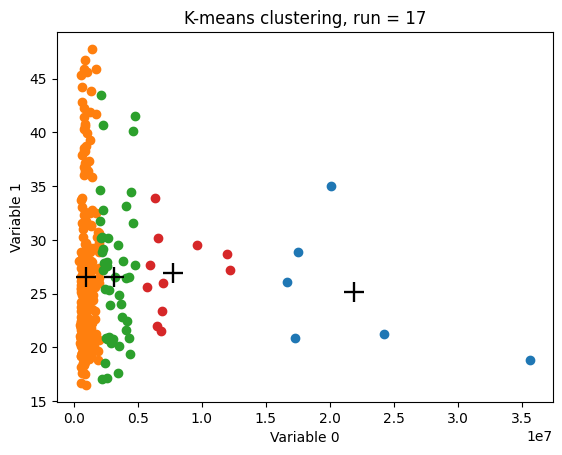

Initial centroids:
[[ 0.5922153  -0.59833145  1.1860632   1.127913   -0.54171306  0.03604536
   3.45275     0.08117954]
 [-0.09416385  2.8568344  -1.5737911   0.3737003  -0.43670386  0.8244892
   0.6903195  -0.3111295 ]
 [-0.30808526 -0.5305832   1.3125392   0.6574549  -0.5405554  -0.09099957
   2.2025988  -0.6304966 ]
 [-0.41993785 -0.6866989   1.6570067   0.2776479  -0.48889938 -1.5468402
  -0.19688438 -0.70343846]]

Distances between data points and centroids:
[[5.74017   3.9966052 4.6638155 3.7750874]
 [5.2481723 3.814046  4.192662  3.4984038]
 [5.9657207 3.9801147 4.7471175 3.4818976]
 ...
 [4.879536  3.7679904 3.812918  3.8674734]
 [6.365447  2.9471111 5.225566  4.657575 ]
 [4.470176  4.078471  3.3523986 3.4540353]]

Nearest centroids for each data point:
[3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 2 2 2 2 3 3 3 3 3
 2 3 3 2 3 3 3 3 2 3 3 3 2 3 2 3 3 3 3 3 3 0 3 3 3 3 3 3 3 2 3 3 3 2 3 3 2
 3 3 3 3 3 2 3 0 3 2 1 3 0 0 2 3 2 3 3 3 3 3 3 3 0 2 0 2 3 2 3 2 3 2 3 3 3
 3 

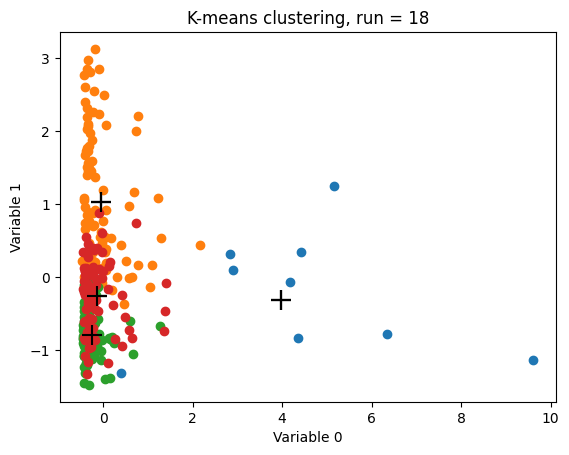

Initial centroids:
[[1.10885305e-02 1.56480014e-01 3.44858378e-01 1.08376611e-03
  9.04511511e-01 7.63800621e-01 2.52873570e-01 1.14404261e-01]
 [8.80472213e-02 1.15840018e-01 5.01896083e-01 4.08945173e-01
  1.94355292e-04 7.10251808e-01 3.18007648e-01 7.91938305e-01]
 [8.56924653e-02 4.17280018e-01 2.80838758e-01 2.56083552e-02
  5.69751561e-01 8.88196349e-01 3.37164730e-01 8.65441561e-02]
 [6.25738781e-03 2.75200069e-01 4.09770280e-01 1.67226359e-01
  3.29221822e-02 4.14016813e-01 2.68199205e-01 2.20806152e-01]]

Distances between data points and centroids:
[[0.9595336  0.88497317 0.657342   0.54086196]
 [0.9347303  0.8275706  0.6263031  0.48199612]
 [0.88102996 0.91829616 0.62274367 0.43612504]
 ...
 [0.71724814 0.84832233 0.3941231  0.6375137 ]
 [0.9844834  1.0921078  0.6034464  0.7188481 ]
 [0.8317418  0.79597604 0.5545223  0.6093491 ]]

Nearest centroids for each data point:
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 0 2 0 3 0 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

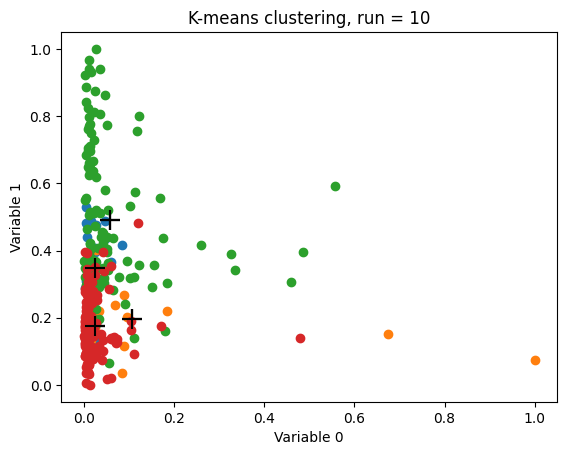

In [20]:
# Set seed for reproducibility
random.seed(seed_value)

# Define number of K-clusters
K = 4


from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(data_cities)

# Run K-Means clustering on data_cities
data_cities_scaled = StandardScaler().fit_transform(data_cities)


cluster_assignments, cluster_centroids = my_kmeans(data_cities, K=K, maxiter=50, do_plot = True)
cluster_assignments_scaled, cluster_centroids_scaled = my_kmeans(data_cities_scaled, K=K, maxiter=50, do_plot = True)
cluster_assignments_normalized, cluster_centroids_normalized = my_kmeans(normalized_data, K=K, maxiter=50, do_plot = True)

**Question 6:** Do you think it is important to scale the data in this case? Provide insights by plotting histograms, and elaborate on whether you would opt for standardization or normalization.

**Answer:**

**------------------------------Answer Start----------------------**

It is important to standadize and not to normalize our data because of the data we have and the mathematic calculation behind each method. Our data does not follow the gaussian distribution in a lot of varaibles , like population, where we have some outliers/low occurings. While normailzation is effected by those outliers because it is looking at min and max values, standardisation is not. It is scaling the data to a mean of zero.

If we would not do either of one, the high values of population will be way more taken into account than the values of attributes with only small values like pollution-pm2.5

**------------------------------Answer End----------------------**

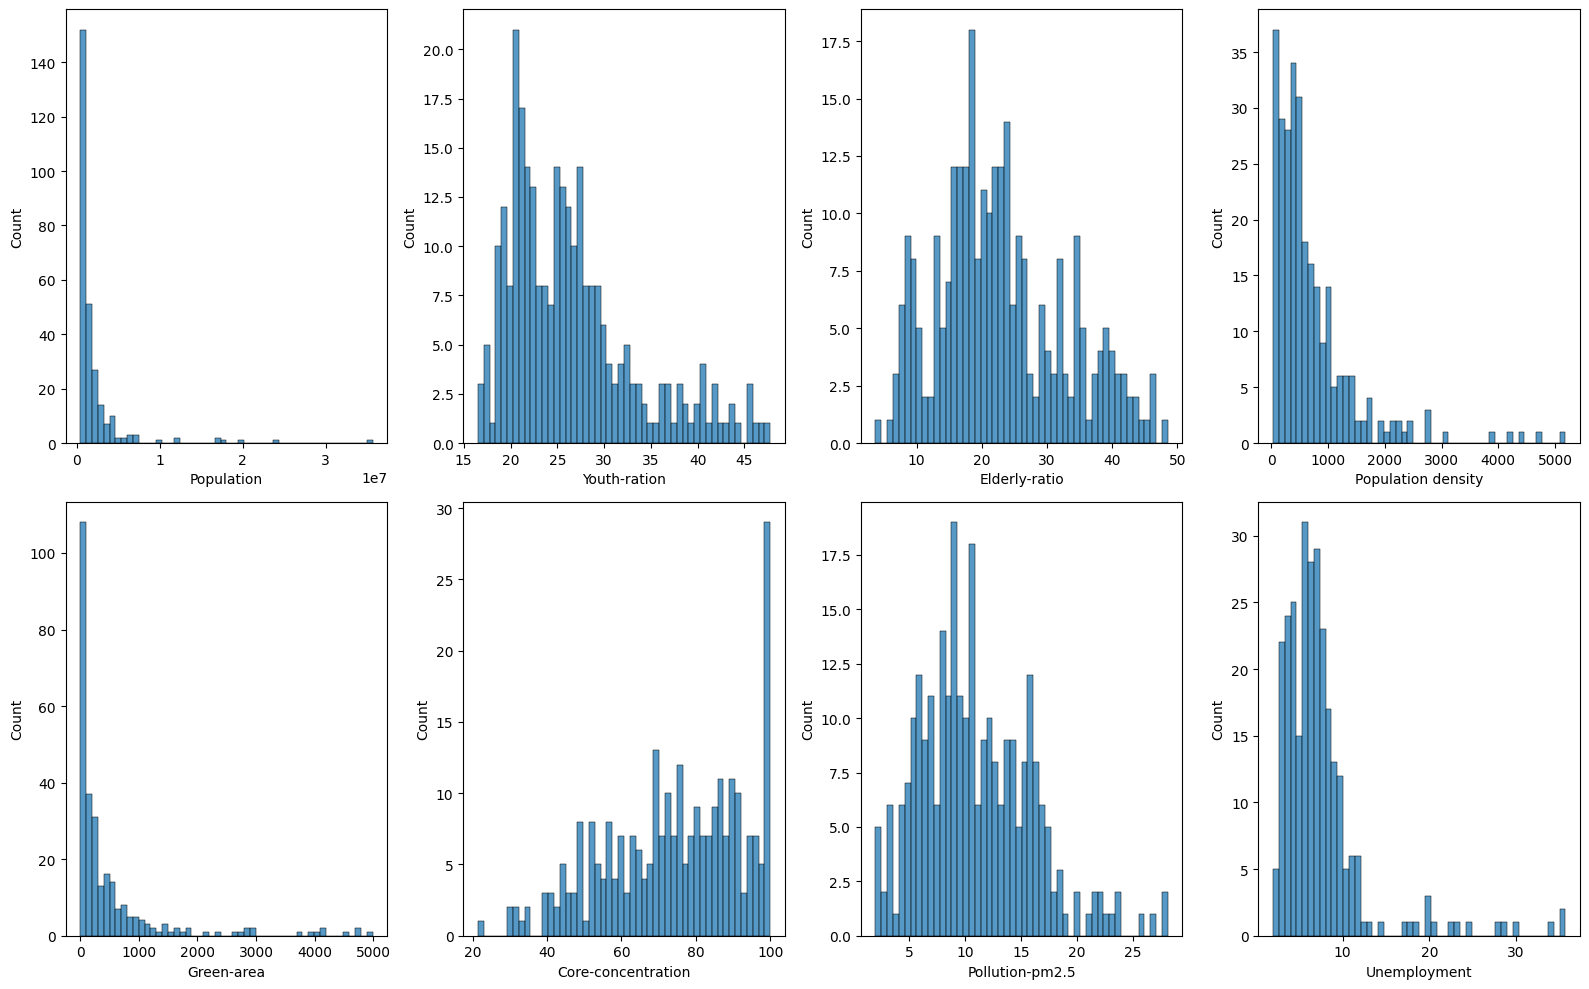

In [21]:
# Codeblock for printing histograms. Not necessary for final results, but helps answering Q6
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize = (16,10))
axes = axes.reshape(-1)

for i in range(-1, 7):
  sns.histplot(data_cities[:,i], ax=axes[i],  bins = 50)
  axes[i].set_xlabel(feature_names[i])

plt.tight_layout()

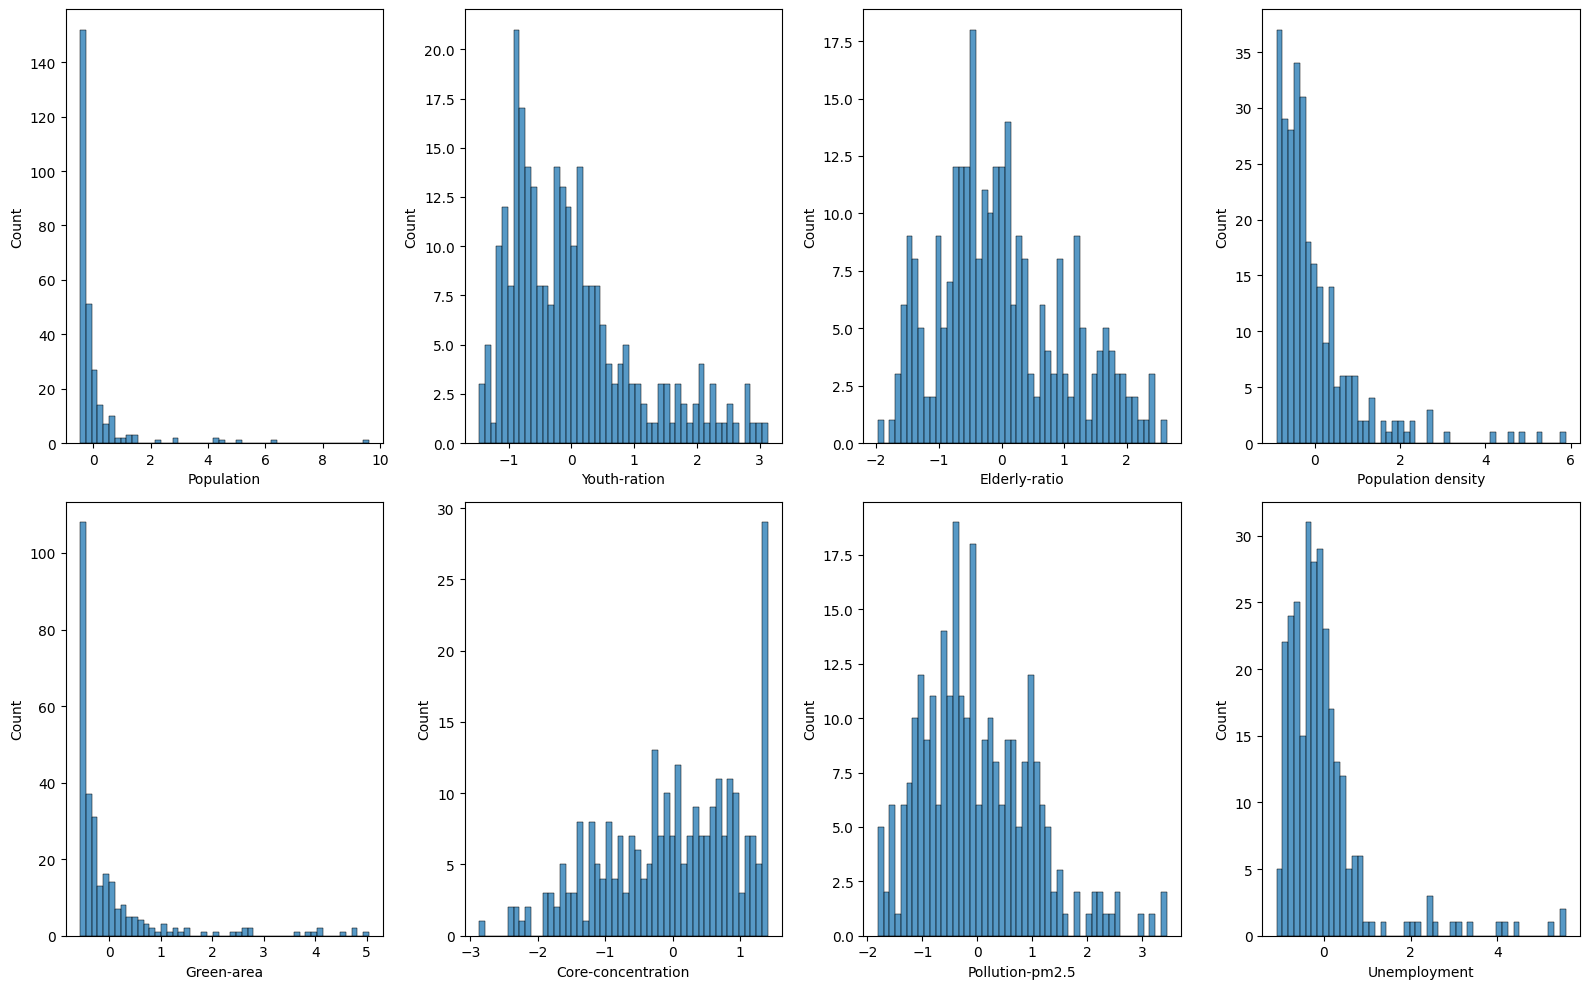

In [22]:
# Codeblock for printing histograms. Not necessary for final results, but helps answering Q6
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize = (16,10))
axes = axes.reshape(-1)

for i in range(-1, 7):
  sns.histplot(data_cities_scaled[:,i], ax=axes[i],  bins = 50)
  axes[i].set_xlabel(feature_names[i])

plt.tight_layout()

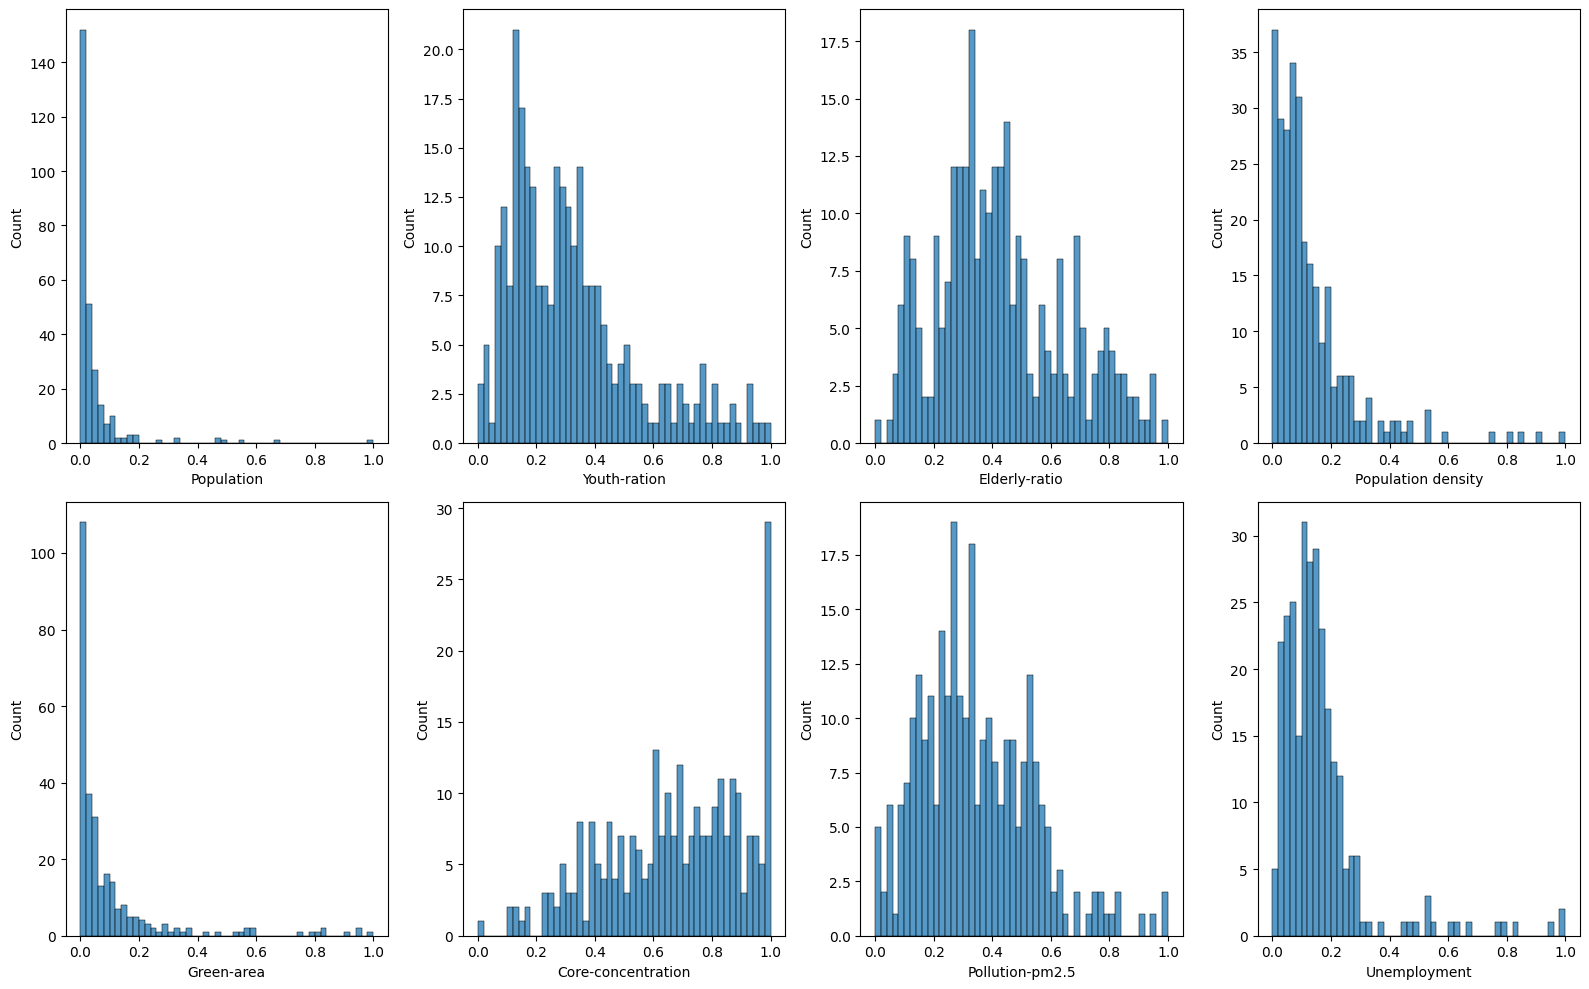

In [23]:
# Codeblock for printing histograms. Not necessary for final results, but helps answering Q6
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize = (16,10))
axes = axes.reshape(-1)

for i in range(-1, 7):
  sns.histplot(normalized_data[:,i], ax=axes[i],  bins = 50)
  axes[i].set_xlabel(feature_names[i])

plt.tight_layout()

**Action 7:** Use the provided code to visualize each centroid.

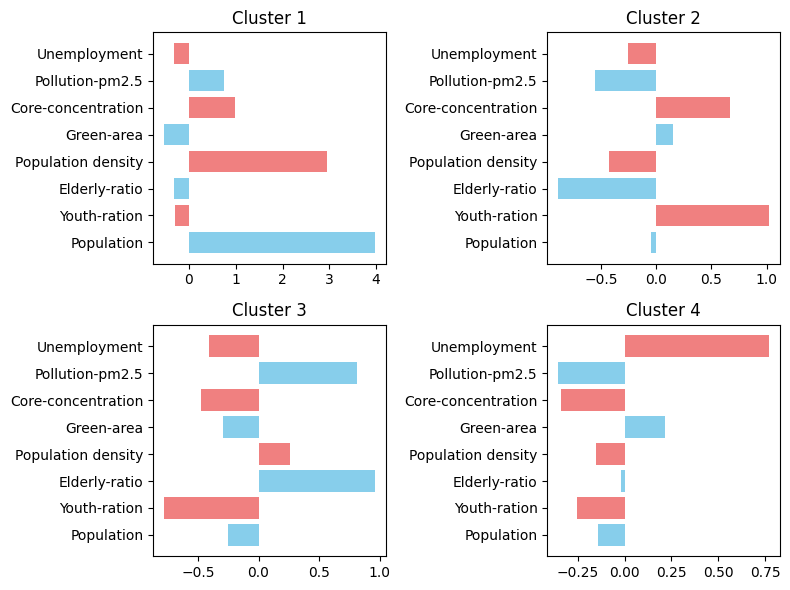

In [24]:
# Calculate the number of subplots in each row
plots_per_row = K // 2 + K % 2

# Create subplots with two rows and share the x-axis
fig, ax = plt.subplots(2, plots_per_row, figsize=(8, 6), sharex=False)

# Flatten the 2D array to make indexing easier
ax = ax.flatten()

# Define alternating colors
colors = ['skyblue', 'lightcoral']

for i in range(K):
    bar_colors = [colors[j % 2] for j in range(number_of_variables)]

    ax[i].barh(np.arange(number_of_variables), cluster_centroids_scaled[i, :], color=bar_colors)
    ax[i].set_yticks(np.arange(number_of_variables))
    ax[i].set_yticklabels(feature_names)

    # Add titles
    ax[i].set_title(f"Cluster {i + 1}")

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

**Question 7:** What are the main characteristics of each cluster?\
**Answer:**


**------------------------------Answer Start----------------------**

Main characteristis are the properties (ranges) that only occur in a single cluster

Note: the numbers are estimated from the histogram to give an better Idea

Cluster 1:
- high positiv population density (3)
- high positiv population (4)

Cluster 2:
- has a positiv youth-ratio (1)
- negativ population density (-0.5)
- a  negative eldery ratio (-0.75)

Cluster 3:
- a population density slighly above 0
- a  positv eldery ratio (1)

Cluster 4:
- high positiv unemployment (0.75)

**------------------------------Answer End----------------------**


**Action 8:** It would also be informative to know which regions are associated with each cluster. Starting with the previous code cell, plot pie charts displaying the proportions of each region per cluster. For this, you will find the numpy function unique() very useful. Take a look at the documentation to make sure that it returns both the unique regions present and the counts. For the pie charts, matplotlib has a plt.pie() function that will do the job.

In [25]:
# Create a colour-scheme so colours remain consistent throughout the for-loop below
color_dict = {
    'Central Europe': '#0096c7',
    'East Asia': '#C70039',
    'Eastern Europe': '#900C3F',
    'Latin America': '#581845',
    'North America': '#FFC300',
    'Northern Europe': '#00BFFF',
    'Oceania': '#008080',
    'Southern Europe': '#FF5733',
    'Western Europe': '#81b29a'
}

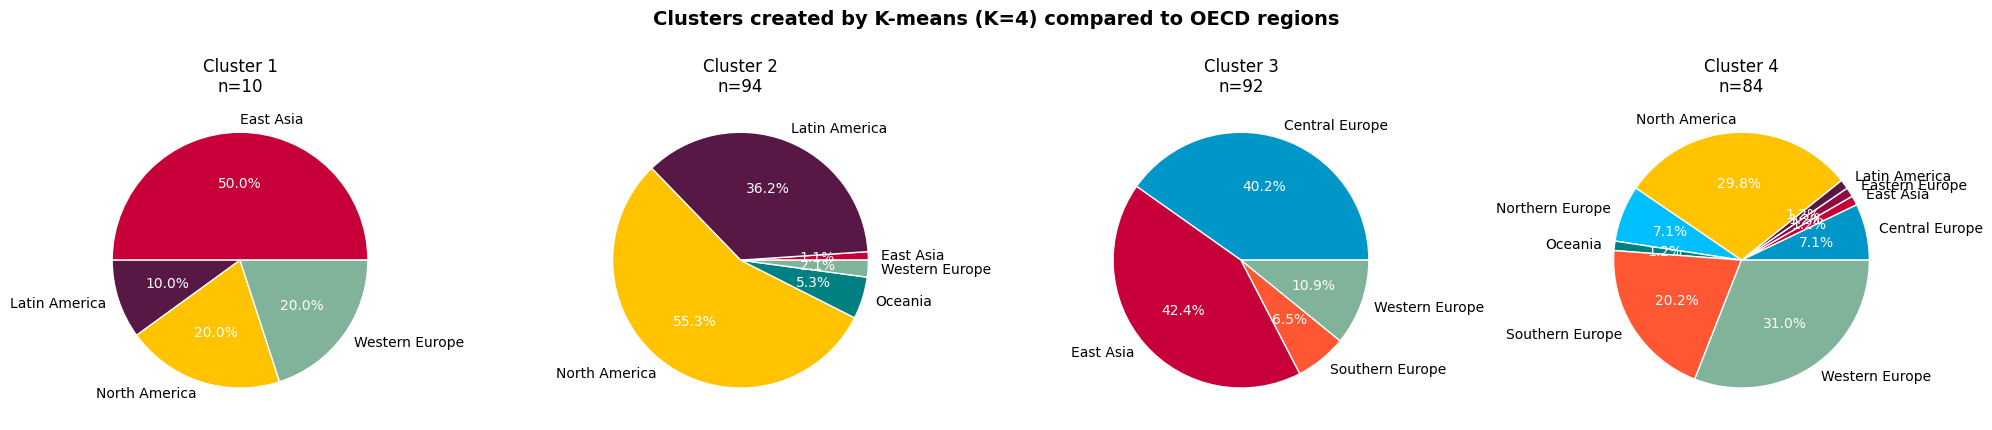

In [26]:
# Plot region proportions per cluster

fig, ax = plt.subplots(1, K, figsize=(5*K, 6))
for i in range(K):
  # Prepare data
  data_byregion = regions[cluster_assignments_scaled == i]
  labels, count = np.unique(data_byregion, return_counts = True)

  # Create some properties for vizualisations
  wedgeprops = {"edgecolor":"white",'linewidth': 1, 'linestyle': 'solid'}

  # Create the pie-chart
  wedges, texts, autotexts = ax[i].pie(count,
                                       autopct='%1.1f%%',
                                       wedgeprops = wedgeprops,
                                       labels = labels, # Assign labels of each region
                                       colors = [color_dict[key] for key in labels]) # This ensures that colours stay consistent throughout the four charts

  # Add titles
  ax[i].title.set_text(f"Cluster {i + 1}\nn={len(data_byregion)}")

  # Change text to white
  for autotext in autotexts:
    autotext.set_color('white')

  # Set aspects to equal to make sure it prints a circle. Recommended by matplotlib documentation
  ax[i].set_aspect('equal')

# Add title
plt.suptitle(f"Clusters created by K-means (K={K}) compared to OECD regions", fontsize = 14, fontweight = 'bold')

# Additional options
plt.tight_layout()

plt.subplots_adjust(top=1.10) # Tight_layout() does not account for .suptitle, therefore we manually set the height

plt.show()

**Question 8:** Discuss some characteristics of each region by looking at both the bar plots and the pie charts. \
**Answer:**


**------------------------------Answer Start----------------------**

Cluster 1:
- is characterised by high population and high population density
- this attributes occur usually in big cities. Those are most likly occur in East Asia and also Europe or North America. Some big cities also occur in Latin/South America and Africa. This are usually the capitals.  
- Also our clusterign shows that 50% of the cities with a high population, pollution and pop_dens is located in Eath Asia. Another 40% (20 % each) is located in Europe and North America. The rest is in Latin America, because data from cities in South America and Africa are not included the data set.
- but be aware that this cluster has way less urban areas assigned than the others. So the city in Latin America might be Mexico City, In Western Europe it might be Paris and London and in North America it might be New York and Los Angeles

Cluster 2:
- is charactersided by high youth ratio and low eldery ratio
- this usually occuring in Africa. But because Africa is not included in the data set, the most urban areas with a high youth ratio and a low eldery ratio seem to be in North America (55.3%) and Latin America (36.2%).

Cluster 3:
- is charactersided by a population density slighly above 0 and a positv eldery ratio
- areas with a positiv eldery ratio are usually cities in Europe, where we have population ageging because increasing live expectations, good healthcare and good education and low birth rates
- we also have those urban araes in China, were we have strict birth regulations or in Japan and South Korea where we also have high living quality
- this is also matching with our results, because 57.6% occure in Europe and 42.4% are in East Asia where China, South Korea and Japan are located.

Cluster 4:
- is characterized by high positiv unemployment
- the cluster result shows that urban areas with a high unemployment are mostly in Europe (65,4%) and North America (29.8%). This can maybe be explained with the high "monitoring" of peoples workstatus in comparison to other areas in the world, where they dont have that. There the goverments dont know how many people are working or even living in a city so they cant really make an assumption about amount of unemployment.

**------------------------------Answer End----------------------**

**Question 9:** Change the feature scaling method (i.e., standardization, normalization), do the clustering results change? Discuss possible causes for differing results. \
**Answer:**

**------------------------------Answer Start----------------------**

- yes it does
- the reason is that different attributes/features have been taken differently into account for the clustering which results in different cluster characteristics and so also differnt cluster assingments  

**------------------------------Answer End----------------------**

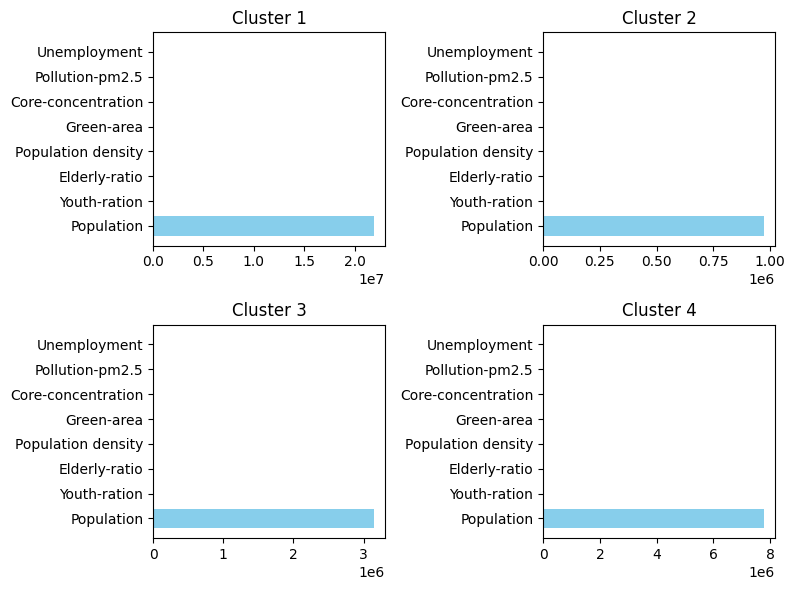

In [27]:
# Calculate the number of subplots in each row
plots_per_row = K // 2 + K % 2

# Create subplots with two rows and share the x-axis
fig, ax = plt.subplots(2, plots_per_row, figsize=(8, 6), sharex=False)

# Flatten the 2D array to make indexing easier
ax = ax.flatten()

# Define alternating colors
colors = ['skyblue', 'lightcoral']

for i in range(K):
    bar_colors = [colors[j % 2] for j in range(number_of_variables)]

    ax[i].barh(np.arange(number_of_variables), cluster_centroids[i, :], color=bar_colors)
    ax[i].set_yticks(np.arange(number_of_variables))
    ax[i].set_yticklabels(feature_names)

    # Add titles
    ax[i].set_title(f"Cluster {i + 1}")

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

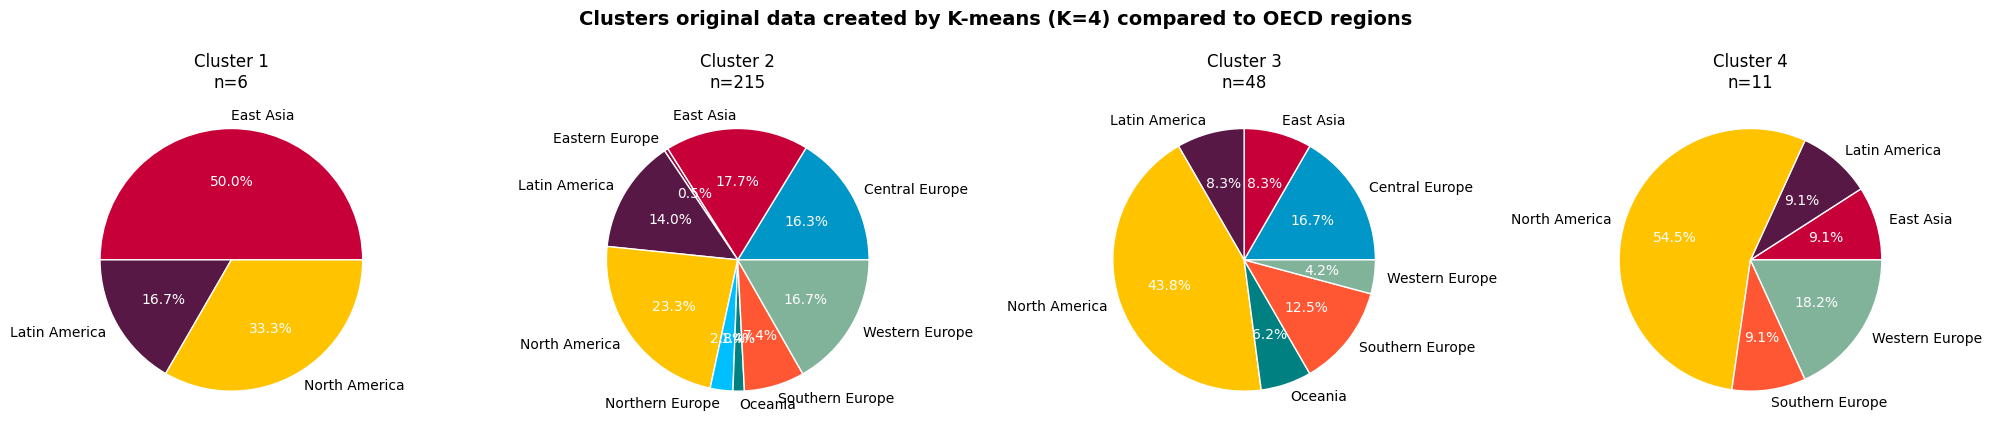

In [28]:
# Plot region proportions per cluster original data

fig, ax = plt.subplots(1, K, figsize=(5*K, 6))
for i in range(K):
  # Prepare data
  data_byregion = regions[cluster_assignments == i]
  labels, count = np.unique(data_byregion, return_counts = True)

  # Create some properties for vizualisations
  wedgeprops = {"edgecolor":"white",'linewidth': 1, 'linestyle': 'solid'}

  # Create the pie-chart
  wedges, texts, autotexts = ax[i].pie(count,
                                       autopct='%1.1f%%',
                                       wedgeprops = wedgeprops,
                                       labels = labels, # Assign labels of each region
                                       colors = [color_dict[key] for key in labels]) # This ensures that colours stay consistent throughout the four charts

  # Add titles
  ax[i].title.set_text(f"Cluster {i + 1}\nn={len(data_byregion)}")

  # Change text to white
  for autotext in autotexts:
    autotext.set_color('white')

  # Set aspects to equal to make sure it prints a circle. Recommended by matplotlib documentation
  ax[i].set_aspect('equal')

# Add title
plt.suptitle(f"Clusters original data created by K-means (K={K}) compared to OECD regions", fontsize = 14, fontweight = 'bold')

# Additional options
plt.tight_layout()

plt.subplots_adjust(top=1.10) # Tight_layout() does not account for .suptitle, therefore we manually set the height

plt.show()

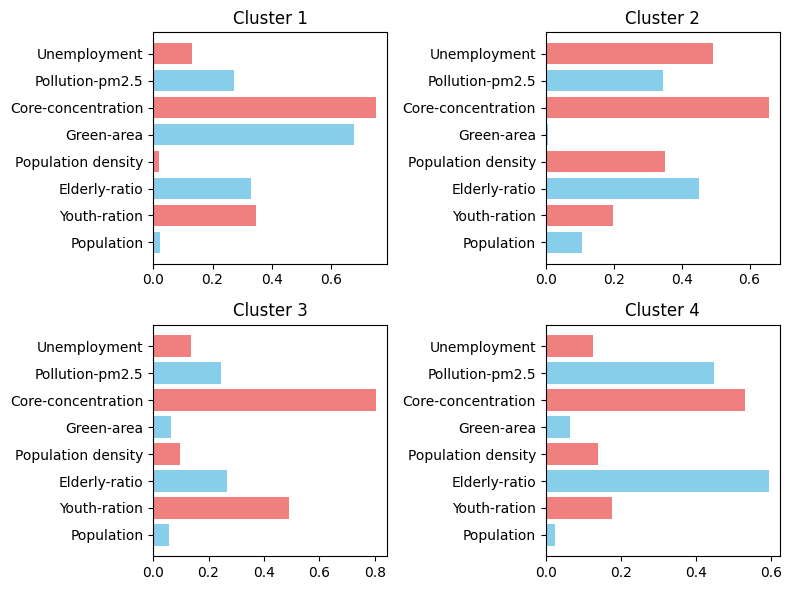

In [29]:
# Calculate the number of subplots in each row normalized
plots_per_row = K // 2 + K % 2

# Create subplots with two rows and share the x-axis
fig, ax = plt.subplots(2, plots_per_row, figsize=(8, 6), sharex=False)

# Flatten the 2D array to make indexing easier
ax = ax.flatten()

# Define alternating colors
colors = ['skyblue', 'lightcoral']

for i in range(K):
    bar_colors = [colors[j % 2] for j in range(number_of_variables)]

    ax[i].barh(np.arange(number_of_variables), cluster_centroids_normalized[i, :], color=bar_colors)
    ax[i].set_yticks(np.arange(number_of_variables))
    ax[i].set_yticklabels(feature_names)

    # Add titles
    ax[i].set_title(f"Cluster {i + 1}")

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

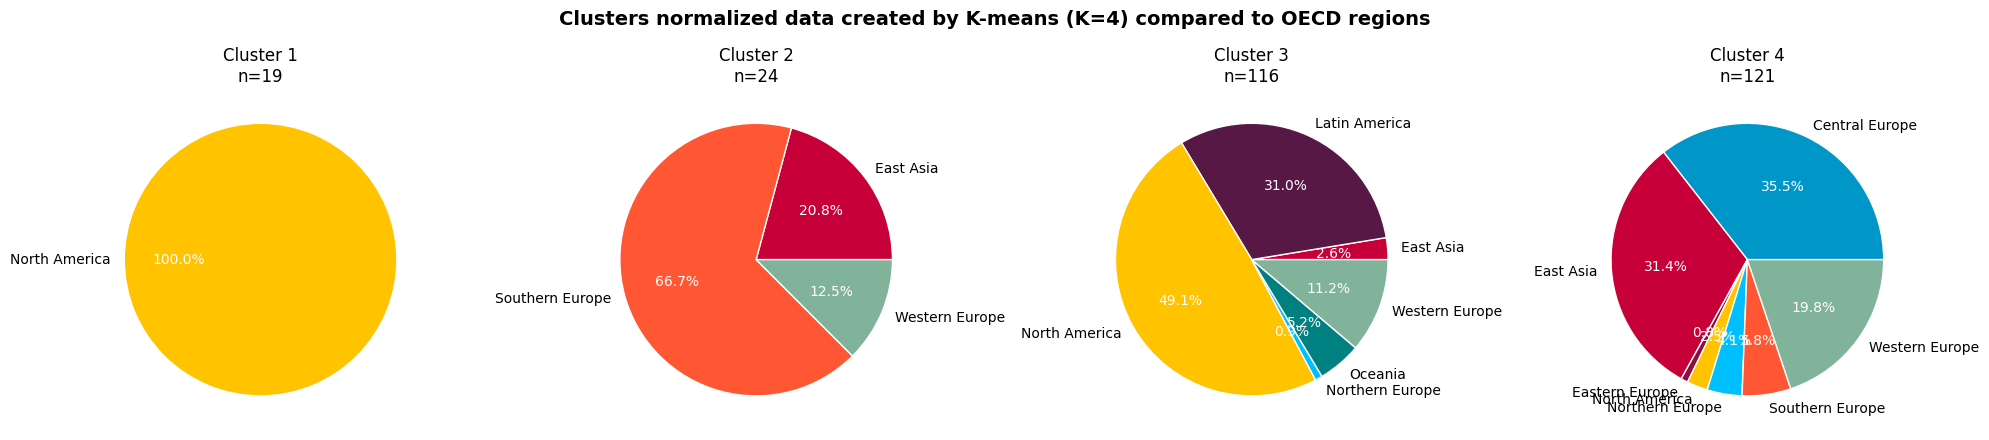

In [30]:
# Plot region proportions per cluster normalized

fig, ax = plt.subplots(1, K, figsize=(5*K, 6))
for i in range(K):
  # Prepare data
  data_byregion = regions[cluster_assignments_normalized == i]
  labels, count = np.unique(data_byregion, return_counts = True)

  # Create some properties for vizualisations
  wedgeprops = {"edgecolor":"white",'linewidth': 1, 'linestyle': 'solid'}

  # Create the pie-chart
  wedges, texts, autotexts = ax[i].pie(count,
                                       autopct='%1.1f%%',
                                       wedgeprops = wedgeprops,
                                       labels = labels, # Assign labels of each region
                                       colors = [color_dict[key] for key in labels]) # This ensures that colours stay consistent throughout the four charts

  # Add titles
  ax[i].title.set_text(f"Cluster {i + 1}\nn={len(data_byregion)}")

  # Change text to white
  for autotext in autotexts:
    autotext.set_color('white')

  # Set aspects to equal to make sure it prints a circle. Recommended by matplotlib documentation
  ax[i].set_aspect('equal')

# Add title
plt.suptitle(f"Clusters normalized data created by K-means (K={K}) compared to OECD regions", fontsize = 14, fontweight = 'bold')

# Additional options
plt.tight_layout()

plt.subplots_adjust(top=1.10) # Tight_layout() does not account for .suptitle, therefore we manually set the height

plt.show()